# Zonal Mean Response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [18]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
import geoxarray

Mon May 21 16:59:28 EDT 2018


In [19]:
# parameters
data_names = ['netrad_toa', 't_surf', 'precip']
figname = f'fig_zonalMean.pdf'
prcp_scale = 3600 * 24

### Agung data

In [20]:
# Agung data
daas_agung = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        # ITCZ lat
        da = da_ctl.mean(['lon', 'en'])
        lat_itcz_agung = da.lat[da.argmax('lat')]
    
    daa = daa.mean('lon') # zonal mean
    tt, pp = ttest_1samp(daa, 0)
    daa = daa.mean('en').load()
    pvalue = xr.DataArray(pp, dims=daa.dims, coords=[daa[dim] for dim in list(daa.dims)])
        
    daas_agung[data_name] = dict()
    daas_agung[data_name]['daa'] = daa
    daas_agung[data_name]['pvalue'] = pvalue


Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.nc


### StMaria data

In [21]:
# St Maria data
daas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        # ITCZ lat
        da = da_ctl.mean(['lon', 'en'])
        lat_itcz_stmaria = da.lat[da.argmax('lat')]
    
    daa = daa.mean('lon') # zonal mean
    tt, pp = ttest_1samp(daa, 0)
    daa = daa.mean('en').load()
    pvalue = xr.DataArray(pp, dims=daa.dims, coords=[daa[dim] for dim in list(daa.dims)])
        
    daas_stmaria[data_name] = dict()
    daas_stmaria[data_name]['daa'] = daa
    daas_stmaria[data_name]['pvalue'] = pvalue

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.nc


### Plot

<IPython.core.display.Javascript object>


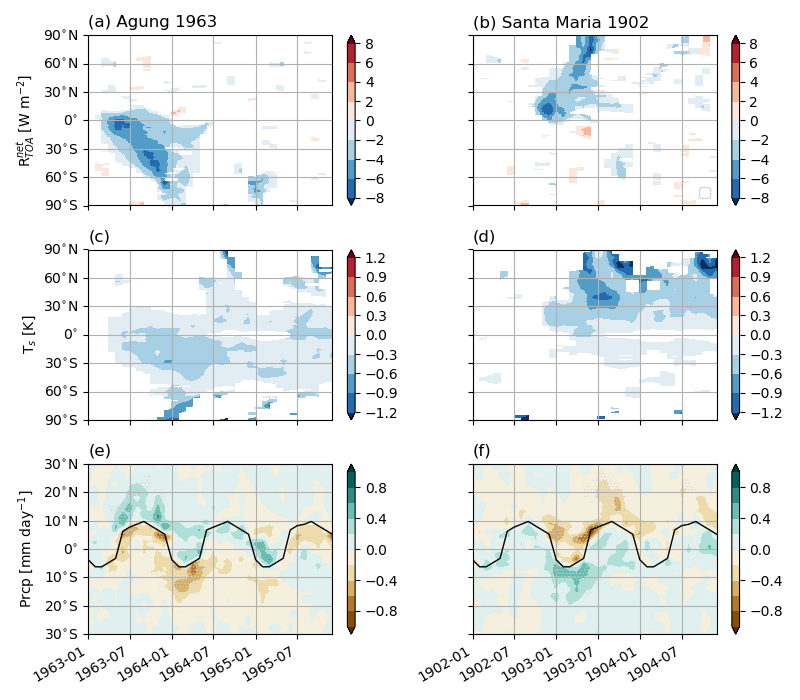

In [45]:
# plot
rcParams['hatch.color'] = 'lightgray'
hatch_pattern = ['.....']
fill_alpha = 0.2
yticks = range(-90, 91, 30)

fig, axes = plt.subplots(3,2,figsize=(8,7), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])
data_name = 'netrad_toa'

daa = daas_agung[data_name]['daa'] # 
pvalue = daas_agung[data_name]['pvalue']
daa.where(pvalue<.05).rename('').plot.contourf(x='time', y='lat', 
#                              levels=10, 
                             levels=np.arange(-8,8+.001,2), extend='both',
                             robust=True, center=0)
# pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
#         colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)

xticksmonth(range(1,13,6))
plt.xlim(['1963-01', '1965-12'])
plt.title('(a) Agung 1963', loc='left')
plt.ylabel('R$^{net}_{TOA}$ [W m$^{-2}$]')
plt.grid(True)
yticks2lat(yticks)
plt.xlabel('')

# ##########
plt.sca(axes[0,1])
data_name = 'netrad_toa'

daa = daas_stmaria[data_name]['daa'] # 
pvalue = daas_stmaria[data_name]['pvalue']
daa.where(pvalue<.05).rename('').plot.contourf(x='time', y='lat', 
#                              levels=10, 
                             levels=np.arange(-8,8+.001,2), extend='both',
                             robust=True, center=0)
# pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
#         colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)

plt.legend(loc='lower right', frameon=True)
xticksmonth(range(1,13,6))
plt.xlim(['1902-01', '1904-12'])
plt.title('(b) Santa Maria 1902', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')

# ############
plt.sca(axes[1,0])
data_name = 't_surf'

daa = daas_agung[data_name]['daa'] # 
pvalue = daas_agung[data_name]['pvalue']
daa.where(pvalue<.05).rename('').plot.contourf(x='time', y='lat', 
#                              levels=10, 
                             levels=np.arange(-1.2,1.2+.001,.3), extend='both',
                             robust=True, center=0)
# pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
#         colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)

xticksmonth(range(1,13,6))
plt.title('(c)', loc='left')
plt.ylabel('T$_s$ [K]')
plt.grid(True)
yticks2lat(yticks)
plt.xlabel('')

# ##########
plt.sca(axes[1,1])
data_name = 't_surf'

daa = daas_stmaria[data_name]['daa'] # 
pvalue = daas_stmaria[data_name]['pvalue']
daa.where(pvalue<.05).rename('').plot.contourf(x='time', y='lat',
#                              levels=10, 
                             levels=np.arange(-1.2,1.2+.001,.3), extend='both',
                             robust=True, center=0)
# pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
#         colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)

xticksmonth(range(1,13,6))
plt.title('(d)', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')

# ############
plt.sca(axes[2,0])
data_name = 'precip'

daa = daas_agung[data_name]['daa'] # 
pvalue = daas_agung[data_name]['pvalue']
daa.rename('').plot.contourf(x='time', y='lat', 
                             levels=np.arange(-1,1+.001, .2), 
#                              levels=10,
                             robust=True, center=0, cmap='BrBG', extend='both')
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)

lat_itcz_agung.plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(e)', loc='left')
plt.ylabel('Prcp [mm day$^{-1}$]')
plt.grid(True)
yticks2lat(np.arange(-30,30+1,10))
plt.ylim(-30,30)
plt.xlabel('')

# ##########
plt.sca(axes[2,1])
data_name = 'precip'

daa = daas_stmaria[data_name]['daa'] # 
pvalue = daas_stmaria[data_name]['pvalue']
daa.rename('').plot.contourf(x='time', y='lat', 
                             levels=np.arange(-1, 1+.001, .2), 
#                              levels=10,
                             robust=True, center=0, cmap='BrBG', extend='both')
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)
lat_itcz_stmaria.plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(f)', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')


plt.tight_layout()
plt.savefig(figname)